_How to save RDA Files_
filename = "mydata.rda"

# Save the DataFrame as an RDA file
save(filename, Dict("my_dataframe" => dat

# How to load CSVs
variable name = CSV.file(file_name or variable holding name) |> DataFrame

# import packages
Make sure the loop at the start has the package name in the PkgList to install the package as a precaution
Import the package or use the 'using function'

# Save graphics
savefig("scatter_plot.png")
# TODO
- Add in some long and wide df
- See how regression model handles this


# Important Notes
The regression model uses a year character for now, the year is set to a string that will convert weekly dates to a year string based
on the first column, splitting by '-' a))

In [1]:
begin
	using Pkg
    PkgList = ["CSV", "DataFrames", "Ipopt", "JuMP", "Plots", "PlutoUI", "Queryverse", "XLSX", "StatsBase", "Query", "VegaLite", "RData", "Lathe", "GLM", "StatsPlots", "MLBase", "RDatasets", "Clustering", "CodecBzip2"]
    for p in PkgList
        if Base.find_package(p) == nothing
            Pkg.add(p)
        end
	end
end


In [2]:
using CSV, VegaLite, DataFrames, RData, Query, Queryverse, CodecBzip2

In [3]:
# loads the dataframe (loads as a dictionary)
price_details = load("price.rda",convertdataframes=true)
price_details = price_details["price"]
# rename price_details Fuel to Fuel Type
#df = DataFrame(A = 1:4, B = ["M", "F", "F", "M"], C = [32, 45, 28, 67])
#df_new = rename(df, :A => :ID, :B => :Gender, :C => :Age)



,Week,Fuel,Value,Unit
,Date…,String,Float64,String
1,2004-04-23,Diesel price,67.5,nzd
2,2004-04-23,Regular petrol price,114.5,nzd
3,2004-04-23,Premium petrol 95R price,117.9,nzd
4,2004-04-30,Diesel price,66.0,nzd
5,2004-04-30,Regular petrol price,113.0,nzd
6,2004-04-30,Premium petrol 95R price,120.9,nzd
7,2004-05-07,Diesel price,70.4,nzd
8,2004-05-07,Regular petrol price,117.3,nzd
9,2004-05-07,Premium petrol 95R price,126.9,nzd


In [5]:
weekly_energy_prices = rename(price_details, :Fuel => :"Fuel Type")

,Week,Fuel Type,Value,Unit
,Date…,String,Float64,String
1,2004-04-23,Diesel price,67.5,nzd
2,2004-04-23,Regular petrol price,114.5,nzd
3,2004-04-23,Premium petrol 95R price,117.9,nzd
4,2004-04-30,Diesel price,66.0,nzd
5,2004-04-30,Regular petrol price,113.0,nzd
6,2004-04-30,Premium petrol 95R price,120.9,nzd
7,2004-05-07,Diesel price,70.4,nzd
8,2004-05-07,Regular petrol price,117.3,nzd
9,2004-05-07,Premium petrol 95R price,126.9,nzd


In [6]:
weekly_energy_prices |> describe
# drop 


,variable,mean,min,median,max,nmissing
,Symbol,Union…,Any,Any,Any,Int64
1,Week,,2004-04-23,2013-11-29,2023-07-07,0
2,Fuel Type,,Diesel price,,Regular petrol price,0
3,Value,170.986,66.0,174.878,316.203,0
4,Unit,,nzd,,nzd,0


In [7]:
year = "2008"
year_data = []
year_backup = []
for data in weekly_energy_prices.Week Number
    date_to_string = string(data)
    year = split(date_to_string,"-")[1]
    if !(year in year_data)
        push!(year_data, year)
        push!(year_backup, year)
    end
end

In [8]:
year_data |> typeof
year_data
year_backup |> typeof
year_backup

20-element Vector{Any}:
 "2004"
 "2005"
 "2006"
 "2007"
 "2008"
 "2009"
 "2010"
 "2011"
 "2012"
 "2013"
 "2014"
 "2015"
 "2016"
 "2017"
 "2018"
 "2019"
 "2020"
 "2021"
 "2022"
 "2023"

In [18]:
df_year_data = DataFrame()
selectors = ["Diesel price excluding taxes","Regular petrol price excluding taxes","Premium petrol 95R price excluding taxes"]
# Resolved a selector issue for years
year = "2008"
for data in eachrow(price_details)
    #ate_to_string = string(data.Week)
    #year = split(string(data.Week),"-")[1]
    year_data = split(string(data.Week),"-")[1]
    if occursin(year, year_data)
        if (data."Fuel" in selectors)
        #println(data)
            push!(df_year_data,data)
        end
    end
end

In [13]:
df_year_data = DataFrame()
selectors = ["Diesel price excluding taxes","Regular petrol price excluding taxes","Premium petrol 95R price excluding taxes"]
# Resolved a selector issue for years
year = "2008"
for data in eachrow(weekly_energy_prices)
    #ate_to_string = string(data.Week)
    #year = split(string(data.Week),"-")[1]
    year_data = split(string(data.Week),"-")[1]
    if occursin(year, year_data)
        push!(df_year_data,data)
    end
end

In [14]:
df_year_data |> describe

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Week,,2008-01-04,,2008-12-26,0,Date
2,Fuel Type,,Diesel price,,Regular petrol price,0,String
3,Value,170.783,107.3,174.65,221.55,0,Float64
4,Unit,,nzd,,nzd,0,String


In [15]:
df_year_data

,Week,Fuel Type,Value,Unit
,Date…,String,Float64,String
1,2008-01-04,Diesel price,123.4,nzd
2,2008-01-04,Regular petrol price,169.7,nzd
3,2008-01-04,Premium petrol 95R price,178.985,nzd
4,2008-01-11,Diesel price,128.4,nzd
5,2008-01-11,Regular petrol price,174.0,nzd
6,2008-01-11,Premium petrol 95R price,178.985,nzd
7,2008-01-18,Diesel price,126.3,nzd
8,2008-01-18,Regular petrol price,171.8,nzd
9,2008-01-18,Premium petrol 95R price,173.984,nzd


In [114]:
# now we would just need a selector for this

In [17]:
# Turn the iterator into a function!
function remove_col_text(column_name,text_string,target_df, replacement_text)
    for col in column_name
        for (i, text) in enumerate(target_df[!, col])
            target_df[i, col] = replace(uppercasefirst(lowercase(text)), text_string => replacement_text)
        end
    end
end

remove_col_text (generic function with 1 method)

In [19]:
# test to see how to add fields to a dataframe!
# We use :product to specify the "product" column, and Symbol("Cost in Dollars") to create a symbol for the "Cost in Dollars" column.
# We use the => operator to assign values to these columns.

# This code should create a new DataFrame df_test with the desired columns and values without encountering the "invalid keyword argument name" error.
df_fuelprice_dollars = DataFrame(
    Symbol("Week") => df_year_data.Week,
    #Symbol("Fuel Type") => df_year_data."Fuel price measure",
    Symbol("Fuel Type") => df_year_data."Fuel Type",
    Symbol("Cost in Dollars") => df_year_data.Value / 100
)

# Define the text to remove

# We define an example DataFrame df with two columns: "Fuel price measure" and "Value Label."

# We specify the text_to_find (string to be replaced) and the replacement_text (string to replace with).

# We create a loop to iterate through the specified columns (columns_to_search) and replace the text using the replace function for each row in those columns.

# After running this code, the specified text ("excluding taxes" in this example) will be replaced with the desired replacement text ("without taxes" in this example) in the specified columns of the DataFrame.
# text_to_find = " excluding taxes"
# replacement_text = ""
# columns_to_search = [:"Fuel"]
# text_to_find = ["excluding taxes","price"]

# for text in text_to_find
#     remove_col_text(columns_to_search, text, df_fuelprice_dollars, replacement_text)
# end

# Remove the text from the specified columns


,Week,Fuel Type,Cost in Dollars
,Date…,String,Float64
1,2008-01-04,Diesel price,1.234
2,2008-01-04,Regular petrol price,1.697
3,2008-01-04,Premium petrol 95R price,1.78985
4,2008-01-11,Diesel price,1.284
5,2008-01-11,Regular petrol price,1.74
6,2008-01-11,Premium petrol 95R price,1.78985
7,2008-01-18,Diesel price,1.263
8,2008-01-18,Regular petrol price,1.718
9,2008-01-18,Premium petrol 95R price,1.73984


In [20]:
df_fuelprice_dollars

,Week,Fuel Type,Cost in Dollars
,Date…,String,Float64
1,2008-01-04,Diesel price,1.234
2,2008-01-04,Regular petrol price,1.697
3,2008-01-04,Premium petrol 95R price,1.78985
4,2008-01-11,Diesel price,1.284
5,2008-01-11,Regular petrol price,1.74
6,2008-01-11,Premium petrol 95R price,1.78985
7,2008-01-18,Diesel price,1.263
8,2008-01-18,Regular petrol price,1.718
9,2008-01-18,Premium petrol 95R price,1.73984


# TODO Plot
This could be a function so it is easier to plot but not sure how it will work may have to return
the data back so it gets displayed.

For a later consideration

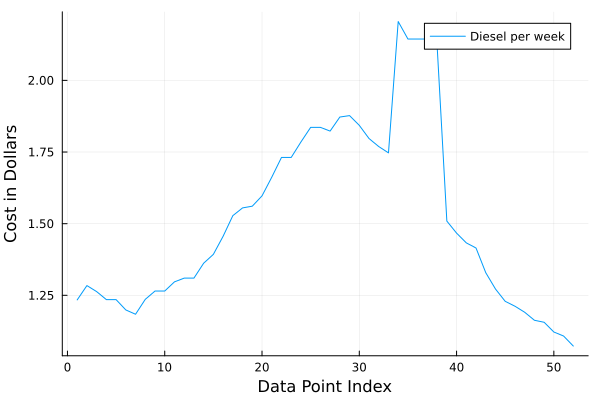

In [21]:
using Plots

# Assuming you have loaded your DataFrame df_fuelprice_dollars already
plot_data = []
FType = "Diesel"
# Extract the data from the "Cost in Dollars" column
#plot_data = df_fuelprice_dollars."Cost in Dollars":Diesel
for data in eachrow(df_fuelprice_dollars)
    if occursin(FType, data."Fuel Type")
        push!(plot_data, data."Cost in Dollars")
    end
end

# Create a line plot from the data
diesel_plot = plot(plot_data, xlabel="Data Point Index", ylabel="Cost in Dollars", label="$FType per week")
savefig("JuliaPlots/lineplot_diesel.png")
diesel_plot

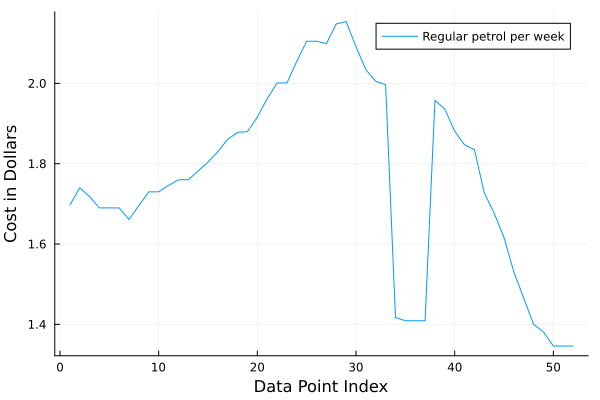

In [22]:
using Plots

# Assuming you have loaded your DataFrame df_fuelprice_dollars already
plot_data = []
FType = "Regular petrol"
# Extract the data from the "Cost in Dollars" column
#plot_data = df_fuelprice_dollars."Cost in Dollars":Diesel
for data in eachrow(df_fuelprice_dollars)
    if occursin(FType, data."Fuel Type")
        push!(plot_data, data."Cost in Dollars")
    end
end

# Create a line plot from the data
reg_petrol_plot = plot(plot_data, xlabel="Data Point Index", ylabel="Cost in Dollars", label="$FType per week")
savefig("JuliaPlots/lineplot_reg_petrol.png")
reg_petrol_plot

# linear regression test
from https://www.machinelearningplus.com/linear-regression-in-julia/

In [23]:
 # Load the installed packages
using Lathe, GLM, Statistics, StatsPlots, MLBase

# Enable printing of 1000 columns
ENV["COLUMNS"] = 1000

1000

In [24]:
df = df_fuelprice_dollars
first(df,5)


,Week,Fuel Type,Cost in Dollars
,Date…,String,Float64
1,2008-01-04,Diesel price,1.234
2,2008-01-04,Regular petrol price,1.697
3,2008-01-04,Premium petrol 95R price,1.78985
4,2008-01-11,Diesel price,1.284
5,2008-01-11,Regular petrol price,1.74


In [25]:
println(size(df))
#> (111, 3)
println(names(df))

(156, 3)
["Week", "Fuel Type", "Cost in Dollars"]


In [26]:
# Fix column names by replacing ' ', '-', '/' with '_'
colnames = Symbol[]
for i in string.(names(df))
    push!(colnames,Symbol(replace(replace(replace(strip(i)," " => "_"),"-" => "_"), "/" => "_")))
end

rename!(df, colnames);

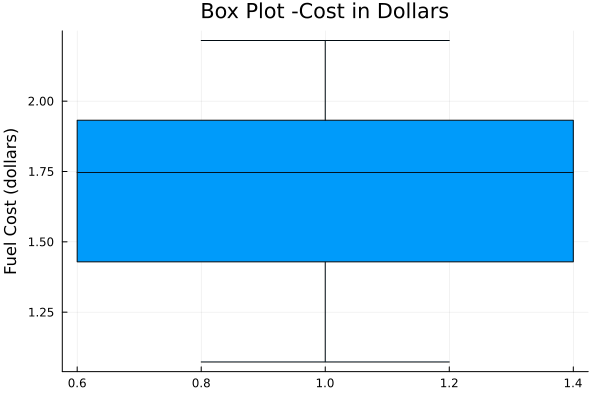

In [27]:
cid_bxplt = boxplot(df.Cost_in_Dollars, title = "Box Plot -Cost in Dollars", ylabel = "Fuel Cost (dollars)", legend = false)
savefig("JuliaPlots/boxplot_FuelCost.png")
cid_bxplt

In [28]:
# Outlier removal
first_percentile = percentile(df.Cost_in_Dollars, 25)
iqr_value = iqr(df.Cost_in_Dollars)
df = df[df.Cost_in_Dollars .>  (first_percentile - 1.5*iqr_value),:];

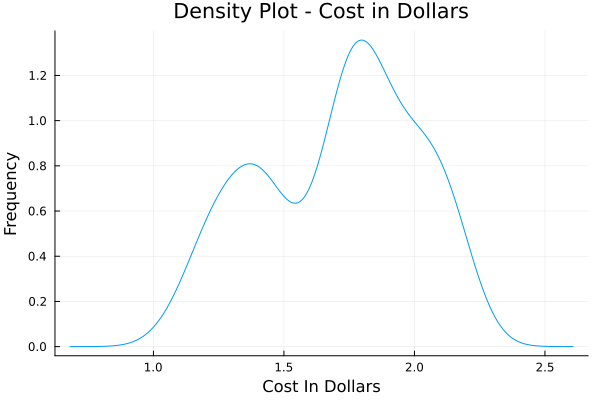

In [29]:
# Density Plot
density_cid = density(df.Cost_in_Dollars , title = "Density Plot - Cost in Dollars", ylabel = "Frequency", xlabel = "Cost In Dollars", legend = false)
savefig("JuliaPlots/DensityPlot_CID.png")
density_cid

In [30]:
df_fuelprice_dollars

,Week,Fuel_Type,Cost_in_Dollars
,Date…,String,Float64
1,2008-01-04,Diesel price,1.234
2,2008-01-04,Regular petrol price,1.697
3,2008-01-04,Premium petrol 95R price,1.78985
4,2008-01-11,Diesel price,1.284
5,2008-01-11,Regular petrol price,1.74
6,2008-01-11,Premium petrol 95R price,1.78985
7,2008-01-18,Diesel price,1.263
8,2008-01-18,Regular petrol price,1.718
9,2008-01-18,Premium petrol 95R price,1.73984


In [31]:
df_fuelprice_dollars

,Week,Fuel_Type,Cost_in_Dollars
,Date…,String,Float64
1,2008-01-04,Diesel price,1.234
2,2008-01-04,Regular petrol price,1.697
3,2008-01-04,Premium petrol 95R price,1.78985
4,2008-01-11,Diesel price,1.284
5,2008-01-11,Regular petrol price,1.74
6,2008-01-11,Premium petrol 95R price,1.78985
7,2008-01-18,Diesel price,1.263
8,2008-01-18,Regular petrol price,1.718
9,2008-01-18,Premium petrol 95R price,1.73984


In [61]:
for data in eachrow(df_fuelprice_dollars.Fuel_Type)
    println(data)
end

["Diesel price "]
["Regular petrol price "]
["Premium petrol 95R price "]
["Diesel price "]
["Regular petrol price "]
["Premium petrol 95R price "]
["Diesel price "]
["Regular petrol price "]
["Premium petrol 95R price "]
["Diesel price "]
["Regular petrol price "]
["Premium petrol 95R price "]
["Diesel price "]
["Regular petrol price "]
["Premium petrol 95R price "]
["Diesel price "]
["Regular petrol price "]
["Premium petrol 95R price "]
["Diesel price "]
["Regular petrol price "]
["Premium petrol 95R price "]
["Diesel price "]
["Regular petrol price "]
["Premium petrol 95R price "]
["Diesel price "]
["Regular petrol price "]
["Premium petrol 95R price "]
["Diesel price "]
["Regular petrol price "]
["Premium petrol 95R price "]
["Diesel price "]
["Regular petrol price "]
["Premium petrol 95R price "]
["Diesel price "]
["Regular petrol price "]
["Premium petrol 95R price "]
["Diesel price "]
["Regular petrol price "]
["Premium petrol 95R price "]
["Diesel price "]
["Regular petrol pri

In [63]:
# clean the fields
df_fuelprice_dollars.Fuel_Type = replace(df_fuelprice_dollars.Fuel_Type, "Diesel price " => "Diesel")
df_fuelprice_dollars.Fuel_Type = replace(df_fuelprice_dollars.Fuel_Type, "Regular petrol price " => "Regular petrol")
# Filter the DataFrame for "Diesel" fuel type

df_diesel = filter(row -> row.Fuel_Type == "Diesel", df_fuelprice_dollars)

# Filter the DataFrame for "Regular petrol" fuel type
df_regular_petrol = filter(row -> row.Fuel_Type == "Regular petrol", df_fuelprice_dollars)

# Display the separate DataFrames
println("DataFrame for Diesel:")
println(df_diesel)

println("\nDataFrame for Regular petrol:")
println(df_regular_petrol)

unique_fuel_types = unique(df_fuelprice_dollars.Fuel_Type)
println(unique_fuel_types)

cor_df = DataFrame(
    Diesel = df_diesel.Cost_in_Dollars,
    Regular_Petrol = df_regular_petrol.Cost_in_Dollars
    )
cor_df

DataFrame for Diesel:
52×3 DataFrame
 Row │ Week        Fuel_Type  Cost_in_Dollars 
     │ Date…       String     Float64         
─────┼────────────────────────────────────────
   1 │ 2008-01-04  Diesel             1.234
   2 │ 2008-01-11  Diesel             1.284
   3 │ 2008-01-18  Diesel             1.263
   4 │ 2008-01-25  Diesel             1.235
   5 │ 2008-02-01  Diesel             1.235
   6 │ 2008-02-08  Diesel             1.199
   7 │ 2008-02-15  Diesel             1.184
   8 │ 2008-02-22  Diesel             1.236
   9 │ 2008-02-29  Diesel             1.265
  10 │ 2008-03-07  Diesel             1.265
  11 │ 2008-03-14  Diesel             1.297
  12 │ 2008-03-21  Diesel             1.31
  13 │ 2008-03-28  Diesel             1.31
  14 │ 2008-04-04  Diesel             1.362
  15 │ 2008-04-11  Diesel             1.393
  16 │ 2008-04-18  Diesel             1.456
  17 │ 2008-04-25  Diesel             1.528
  18 │ 2008-05-02  Diesel             1.555
  19 │ 2008-05-09  Diesel       

,Diesel,Regular_Petrol
,Float64,Float64
1,1.234,1.697
2,1.284,1.74
3,1.263,1.718
4,1.235,1.69
5,1.235,1.69
6,1.199,1.69
7,1.184,1.661
8,1.236,1.696
9,1.265,1.73


In [89]:
df_diesel

,Week,Fuel_Type,Cost_in_Dollars
,Date…,String,Float64
1,2008-01-04,Diesel,1.234
2,2008-01-11,Diesel,1.284
3,2008-01-18,Diesel,1.263
4,2008-01-25,Diesel,1.235
5,2008-02-01,Diesel,1.235
6,2008-02-08,Diesel,1.199
7,2008-02-15,Diesel,1.184
8,2008-02-22,Diesel,1.236
9,2008-02-29,Diesel,1.265


Correlation of Diesel with Regular Petrol 0.39247949173143604




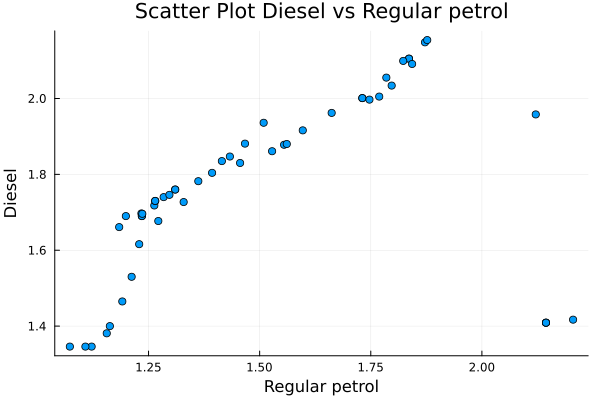

In [90]:
# Correlation Analysis
#println("Correlation of Life Expectancy with Adult Mortality Rate is ", cor(df.Regular_Petrol,df.Diesel), "\n\n")
println("Correlation of Diesel with Regular Petrol ", cor(df_diesel.Cost_in_Dollars,df_regular_petrol.Cost_in_Dollars), "\n\n")

# Scatter plot
train_plot = scatter(df_diesel.Cost_in_Dollars,df_regular_petrol.Cost_in_Dollars, title = "Scatter Plot Diesel vs Regular petrol", ylabel = "Diesel", xlabel = "Regular petrol",legend = false)
savefig("JuliaPlots/scatter_trainPlot.png")
train_plot

In [91]:
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(cor_df,.75)

(36×2 DataFrame
 Row │ Diesel   Regular_Petrol 
     │ Float64  Float64        
─────┼─────────────────────────
   1 │ 1.234             1.697
   2 │ 1.284             1.74
   3 │ 1.263             1.718
   4 │ 1.235             1.69
   5 │ 1.235             1.69
   6 │ 1.265             1.73
   7 │ 1.297             1.746
   8 │ 1.31              1.76
   9 │ 1.31              1.76
  10 │ 1.362             1.782
  11 │ 1.393             1.804
  ⋮  │    ⋮           ⋮
  27 │ 2.20516           1.417
  28 │ 2.14416           1.409
  29 │ 2.12116           1.958
  30 │ 1.509             1.936
  31 │ 1.433             1.847
  32 │ 1.272             1.677
  33 │ 1.229             1.616
  34 │ 1.191             1.465
  35 │ 1.156             1.381
  36 │ 1.108             1.346
                15 rows omitted, 16×2 DataFrame
 Row │ Diesel   Regular_Petrol 
     │ Float64  Float64        
─────┼─────────────────────────
   1 │ 1.199             1.69
   2 │ 1.184             1.661
   3 │ 1.236  

In [92]:
fm = @formula(Diesel ~ Regular_Petrol)
linearRegressor = lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Diesel ~ 1 + Regular_Petrol

Coefficients:
──────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)     0.36824     0.374038  0.98    0.3318  -0.391896    1.12838
Regular_Petrol  0.645929    0.204269  3.16    0.0033   0.230804    1.06105
──────────────────────────────────────────────────────────────────────────

In [93]:
# R Square value of the model
r2(linearRegressor)
#> 0.4548557168286279


0.2272581122704882

In [94]:
# Prediction
ypredicted_test = predict(linearRegressor, test)
ypredicted_train = predict(linearRegressor, train)

# Test Performance DataFrame (compute squared error)
performance_testdf = DataFrame(y_actual = test[!,:Diesel], y_predicted = ypredicted_test)
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error

# Train Performance DataFrame (compute squared error)
performance_traindf = DataFrame(y_actual = train[!,:Diesel], y_predicted = ypredicted_train)
performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error ;

In [95]:
# MAPE function defination
function mape(performance_df)
    mape = mean(abs.(performance_df.error./performance_df.y_actual))
    return mape
end

mape (generic function with 1 method)

In [96]:
# RMSE function defination
function rmse(performance_df)
    rmse = sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end

rmse (generic function with 1 method)

In [97]:
# Test Error
println("Mean Absolute test error: ",mean(abs.(performance_testdf.error)), "\n")
println("Mean Aboslute Percentage test error: ",mape(performance_testdf), "\n")
println("Root mean square test error: ",rmse(performance_testdf), "\n")
println("Mean square test error: ",mean(performance_testdf.error_sq), "\n")

Mean Absolute test error: 0.24242142022625135

Mean Aboslute Percentage test error: 0.15642886202128592

Root mean square test error: 0.34322410401065623

Mean square test error: 0.11780278557391778



In [98]:
# Train  Error
println("Mean train error: ",mean(abs.(performance_traindf.error)), "\n")
println("Mean Absolute Percentage train error: ",mape(performance_traindf), "\n")
println("Root mean square train error: ",rmse(performance_traindf), "\n")
println("Mean square train error: ",mean(performance_traindf.error_sq), "\n")

Mean train error: 0.18443790450364897

Mean Absolute Percentage train error: 0.11712644698807814

Root mean square train error: 0.265881195845535

Mean square train error: 0.07069281030425174



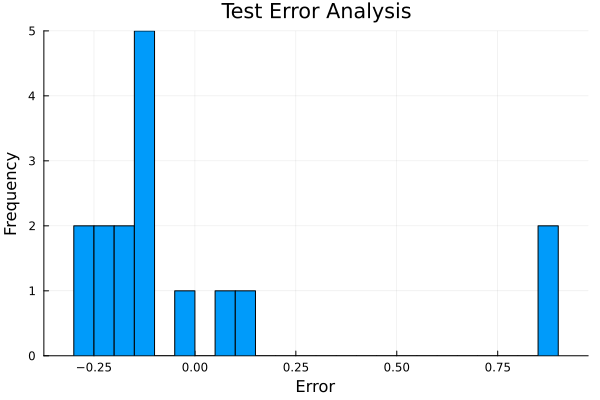

In [99]:
# Histogram of error to see if it's normally distributed  on test dataset
test_df_hist = histogram(performance_testdf.error, bins = 50, title = "Test Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)
savefig("JuliaPlots/histogram_perfomance_testdf_error.png")
test_df_hist

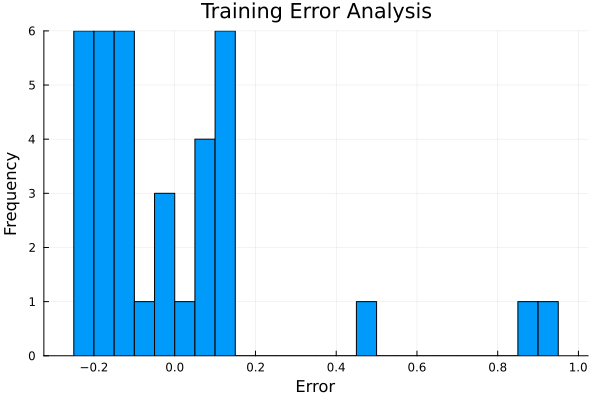

In [100]:
# Histogram of error to see if it's normally distributed  on train dataset
train_df_hist = histogram(performance_traindf.error, bins = 50, title = "Training Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)
savefig("JuliaPlots/histogram_performance_traindf_error.png")
train_df_hist

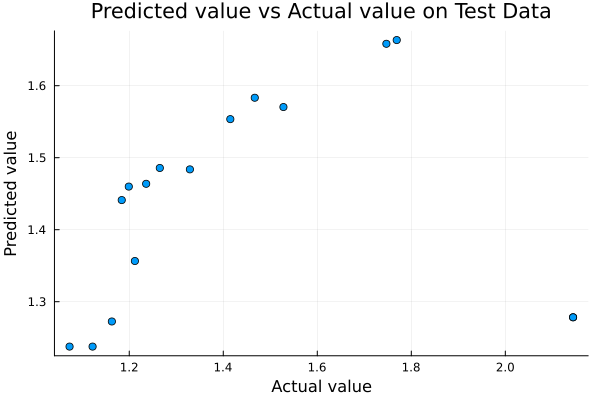

In [101]:
# Scatter plot of actual vs predicted values on test dataset
test_plot = scatter(performance_testdf[!,:y_actual],performance_testdf[!,:y_predicted], title = "Predicted value vs Actual value on Test Data", ylabel = "Predicted value", xlabel = "Actual value", legend = false)
savefig("JuliaPlots/scatter_performance_testdf_error.png")
test_plot

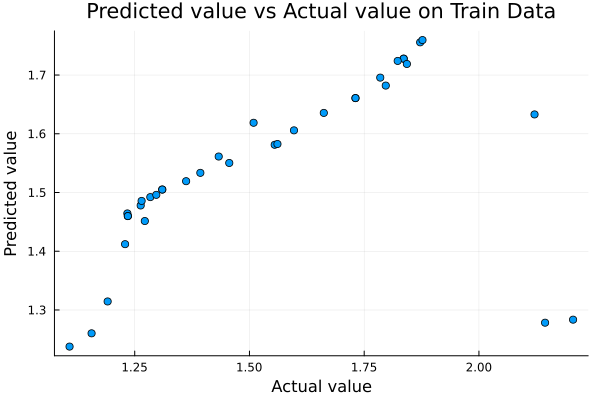

In [102]:
# Scatter plot of actual vs predicted values on train dataset
train_plot = scatter(performance_traindf[!,:y_actual],performance_traindf[!,:y_predicted], title = "Predicted value vs Actual value on Train Data", ylabel = "Predicted value", xlabel = "Actual value",legend = false)
savefig("JuliaPlots/scatter_performance_traindf.png")
train_plot

In [103]:
function find_smallest_k(dataset)
     # Create an array of Float64 values    
    # Find the index of the smallest value in the array
    min_index = argmin(dataset)
    # Get the smallest value itself
    min_value = dataset[min_index]
    
    # Print the smallest value and its location
    println("Mean error for set $min_index is the smallest value ", min_value)
    #println("Location (Index):", min_index)
end

find_smallest_k (generic function with 1 method)

In [104]:
# Cross Validation function defination
function cross_validation(train,k, fm = @formula(Diesel ~ Regular_Petrol))   
    a = collect(Kfold(size(train)[1], k))
    mean_data_points = []
    for i in 1:k
        row = a[i]
        temp_train = train[row,:]
        temp_test = train[setdiff(1:end, row),:]
        linearRegressor = lm(fm, temp_train)
        performance_testdf = DataFrame(y_actual = temp_test[!,:Diesel], y_predicted = predict(linearRegressor, temp_test))
        performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]

        println("Mean error for set $i is ",mean(abs.(performance_testdf.error)))
        push!(mean_data_points,  mean(abs.(performance_testdf.error)))
    end
    find_smallest_k(mean_data_points)
end

cross_validation (generic function with 2 methods)

In [105]:
cross_validation(train,10)

Mean error for set 1 is 0.16109502557137
Mean error for set 2 is 0.11367462913120903
Mean error for set 3 is 0.1659121162011301
Mean error for set 4 is 0.2882639137751571
Mean error for set 5 is 0.34432275788984545
Mean error for set 6 is 0.1477702732745742
Mean error for set 7 is 0.3720198257776566
Mean error for set 8 is 0.1411066044337847
Mean error for set 9 is 0.13643412908641647
Mean error for set 10 is 0.1459666312047243
Mean error for set 2 is the smallest value 0.11367462913120903


In [106]:
# max k-fold validation based on train size!
#cross_validation(train,size(train)[1])


In [107]:
cross_validation(train,size(train)[1])

Mean error for set 1 is 0.20102889876621877
Mean error for set 2 is 0.23345867521263308
Mean error for set 3 is 0.09500363362617126
Mean error for set 4 is 0.11670047286874574
Mean error for set 5 is 0.07368699363579867
Mean error for set 6 is 0.13200178513305016
Mean error for set 7 is 0.23345867521263308
Mean error for set 8 is 0.1445249889334459
Mean error for set 9 is 0.5078926043475163
Mean error for set 10 is 0.1867019100718912
Mean error for set 11 is 0.13679847554820568
Mean error for set 12 is 0.2280023721460127
Mean error for set 13 is 0.12762333924589875
Mean error for set 14 is 0.13339241575546112
Mean error for set 15 is 0.10662907916473352
Mean error for set 16 is 0.1927769717892347
Mean error for set 17 is 0.027102849026593878
Mean error for set 18 is 0.11670047286874574
Mean error for set 19 is 1.043957381713629
Mean error for set 20 is 0.20531949743591316
Mean error for set 21 is 0.20102889876621877
Mean error for set 22 is 0.027532898778846793
Mean error for set 23 is

In [108]:
# cluster analysis

using RDatasets, Clustering
 
# loading the dataset
iris = dataset("datasets", "iris"); 
 
# features for clustering
features = collect(Matrix(iris[:, 1:4])'); 
 
# result after running K-means for the 3 clusters
result = kmeans(features, 3); 
 
# plotting the result
s_result = scatter(iris.PetalLength, iris.PetalWidth, 
        marker_z = result.assignments,
        color =:lightrainbow, legend = false)
 
# saving the result in PNG form
savefig("JuliaPlots/cluster_scatter_iris.png")

"/mnt/c/syn-data/University of Canterbury/Courses/DATA422/Assignments/Group Project/Notebook/JuliaPlots/cluster_scatter_iris.png"

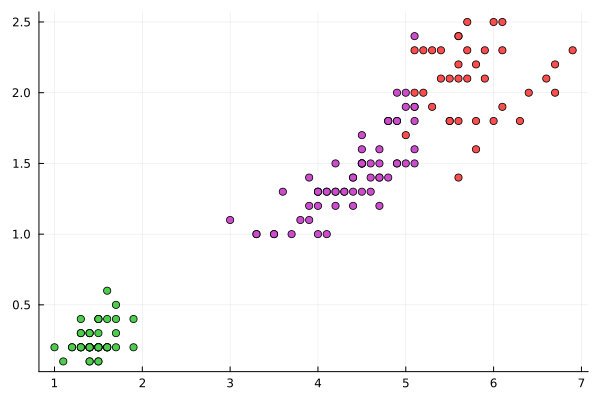

In [109]:
s_result

In [110]:
# cluster of ours
using Clustering

# loading the dataset
fuel_cluster = DataFrame(
    Diesel = df_diesel.Cost_in_Dollars,
    Regular_Petrol = df_regular_petrol.Cost_in_Dollars
    )
 
# features for clustering
features = collect(Matrix(fuel_cluster[:, 1:2])'); 
 
# result after running K-means for the 3 clusters
result = kmeans(features, 3); 
 
# plotting the result
fuel_result = scatter(fuel_cluster.Diesel, fuel_cluster.Regular_Petrol, 
        marker_z = result.assignments,
        color =:lightrainbow, legend = false)
 
# saving the result in PNG form
savefig("JuliaPlots/cluster_scatter_fuel_types.png")

"/mnt/c/syn-data/University of Canterbury/Courses/DATA422/Assignments/Group Project/Notebook/JuliaPlots/cluster_scatter_fuel_types.png"

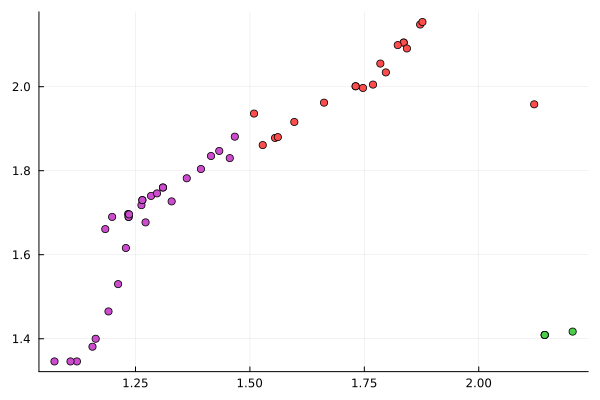

In [111]:
fuel_result